## Import requirements

You should have pandas and matplotlib installed.

Run:
$ pip install pandas matplotlib

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

## Read dataset

Dataset contains worldwide data about covid-19 from EU Open Data Portal.

Link: https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data

In [2]:
# Read the dataset
data = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

## Dataset Processing

Dataset contains information that are not useful for getting cases for specific countries by date, so they should be removed. Also, the dataset should be in reversed order in order to plot the cases in ascending order.

In [3]:
# Delete useless columns
data = data.drop(
    columns=[
             'day',
             'month',
             'year',
             'geoId',
             'continentExp',
             'countryterritoryCode',
             'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000',
             'popData2019'
             ]
    )

# Rename columns
data.rename(
    columns={
        'countriesAndTerritories': 'country',
        'dateRep': 'date'
        }, inplace=True)

# Reverse the data (Plots are showed in a better way)
data = data.reindex(index=data.index[::-1])


## Country selection

Change the country variable to the country of your choice to limit dataset to your needs.

In [4]:
# Greece
country = 'Greece'

# Use only data for specific country
data = data[data['country'].str.contains(country)]

## Plotting in a correct way

The date format is changed to datetime in order to plot the cases in the right way.

In [5]:
# Beutify dates
data.date = pd.to_datetime(data['date'], format='%d/%m/%Y')

## Plot creation

Creating the cases plot with the right information.

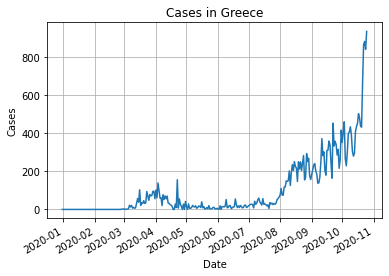

In [6]:
# Create plot
fig, ax = plt.subplots()
ax.plot(data.set_index('date')['cases'])

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Set labels
ax.set(xlabel='Date', ylabel='Cases', title='Cases in Greece')

# Show plots
fig.autofmt_xdate()
ax.grid()
plt.show()

## Total cases

Calculating the total cases and printing them.

In [7]:
total_cases = str(data.cases.sum())
print("Total cases: " + total_cases)

Total cases: 29992
